Project Luther: Ebertron
--
Ozzie Liu - ozzie@ozzieliu.com

Part 3/3 - Exploratory data analysis and linear regression modeling for movie rating data

### Process:
1. <a href='#1-EDA'>Exploratory Data Analysis</a>
2. <a href='#2-regression'>Regression Modeling</a>
3. <a href='#3-predicting'>Predicting Real Test Cases</a>

### Packages:
- requests - fetch HTML pages
- BeautifulSoup: web scraping
- time: to add in a sleep delay when scraping
- tqdm: a nifty tool to show progress bar
- pandas: for data frames
- pickle: to pickle things

In [131]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

# 1. Exploratory Data Analysis
<a id='1-EDA'></a>

### 1a. Histogram of Roger Ebert's Movie Ratings

In [3]:
## Load data that's been cleaned in Part 2
movie_df = pickle.load(open('movie_reviews_full.pkl', 'rb'))

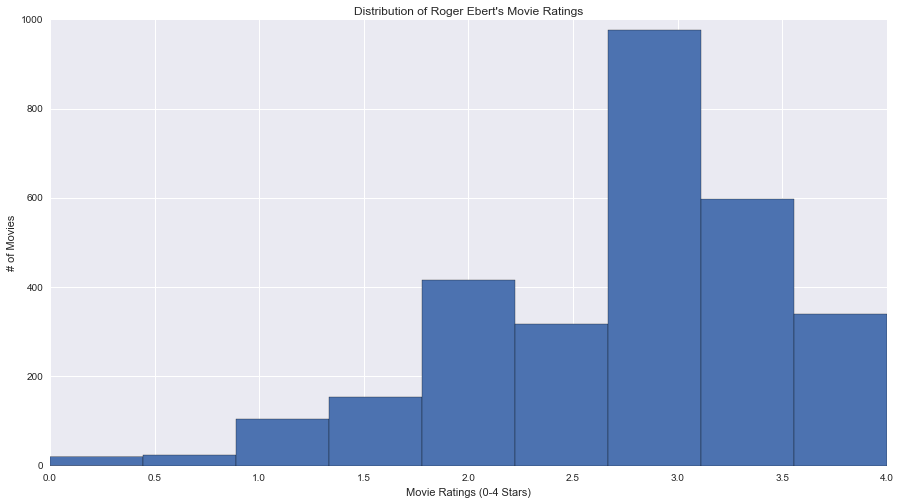

In [4]:
plt.figure(figsize=(15,8))
plt.hist(movie_df['EbertStars'], bins = 9)
plt.title("Distribution of Roger Ebert's Movie Ratings")
plt.xlabel('Movie Ratings (0-4 Stars)')
plt.ylabel('# of Movies')

### 1b. Pair plot with Ebert's review ratings against other ratings

In [37]:
movie_ratings = movie_df[['Title', 'EbertStars', 'Genre', 'Metacritic', 'imdbRating', 'Rating', 'userRating']]

In [38]:
## Drop NA values to get a set of complete datas
complete_df = movie_ratings.dropna()

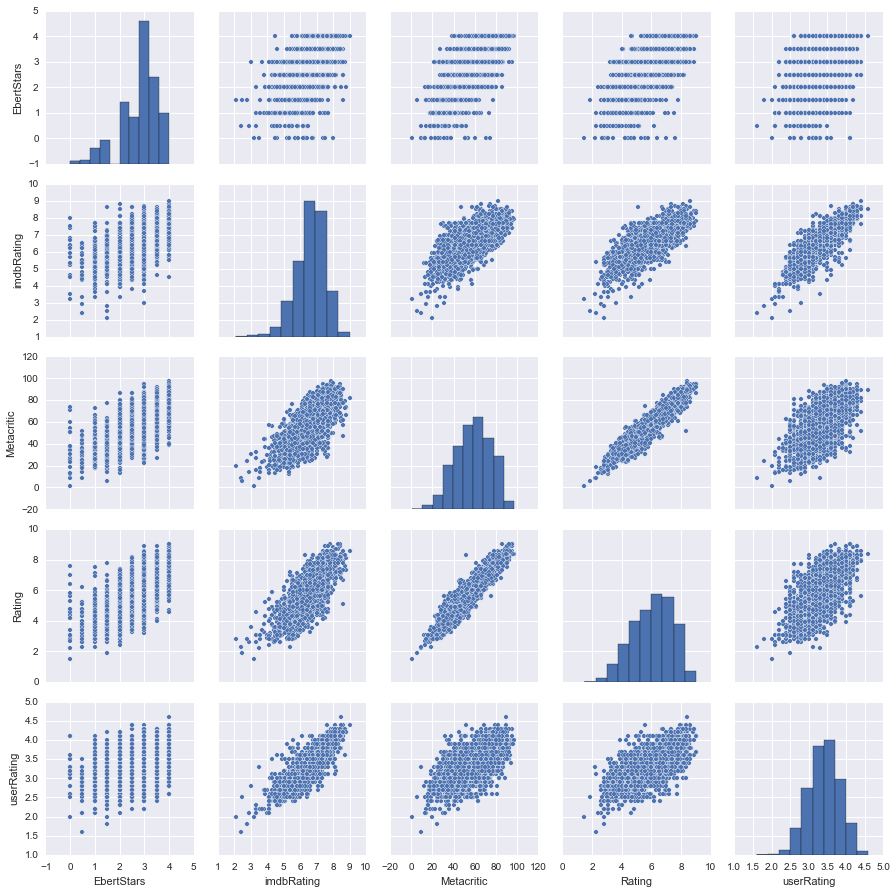

In [39]:
seaborn.pairplot(complete_df[['EbertStars', 'imdbRating', 'Metacritic', 'Rating', 'userRating']])

## 1c. Ebert's ratings vs IMDB's rating

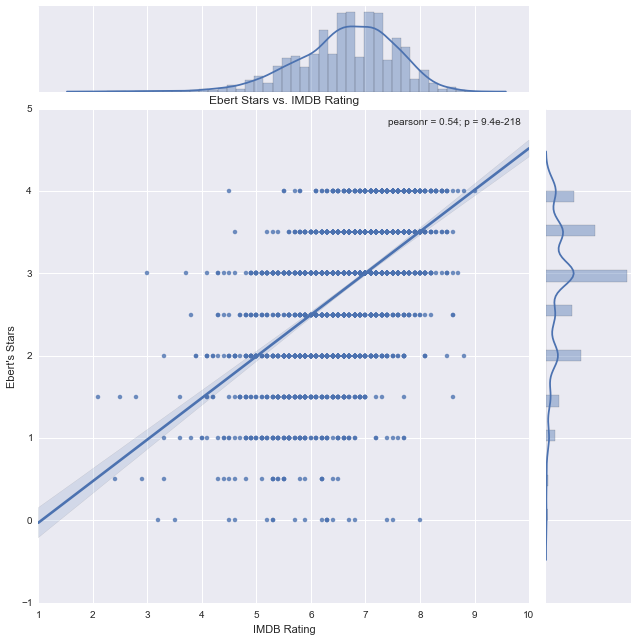

In [48]:
seaborn.jointplot(x='imdbRating', y='EbertStars', data = complete_df, kind = 'reg', size = 9)
plt.xlabel('IMDB Rating')
plt.ylabel("Ebert's Stars")
plt.title('Ebert Stars vs. IMDB Rating')

## 1d. Ebert's ratings vs Metacritic Rating

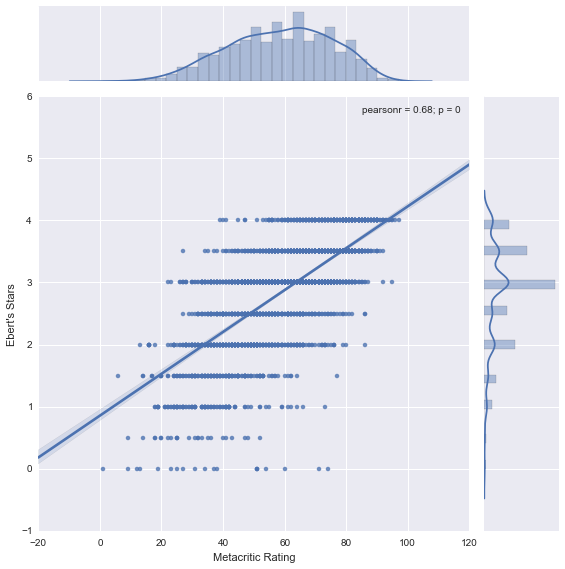

In [49]:
seaborn.jointplot(x='Metacritic', y='EbertStars', data = complete_df, kind = 'reg', size = 8)
plt.xlabel('Metacritic Rating')
plt.ylabel("Ebert's Stars")
# plt.title('Ebert Stars vs. Metacritic')

## 1d. Ebert's ratings vs Rotten Tomatoes Critic Rating

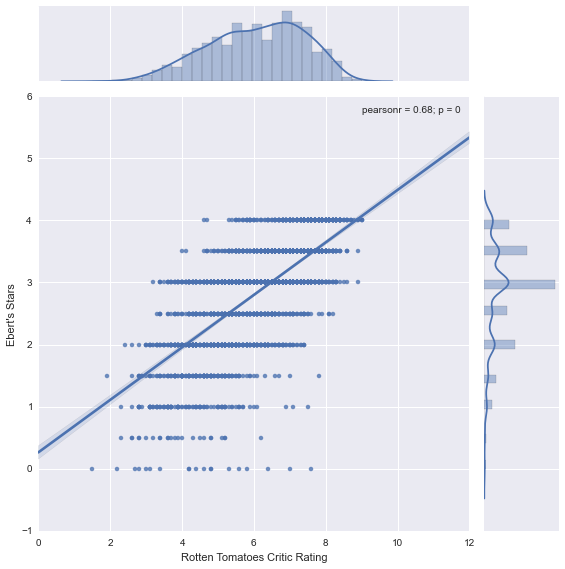

In [50]:
seaborn.jointplot(x='Rating', y='EbertStars', data = complete_df, kind = 'reg', size = 8)
plt.xlabel('Rotten Tomatoes Critic Rating')
plt.ylabel("Ebert's Stars")

## 1e. Ebert's ratings vs Rotten Tomatoes user ratings

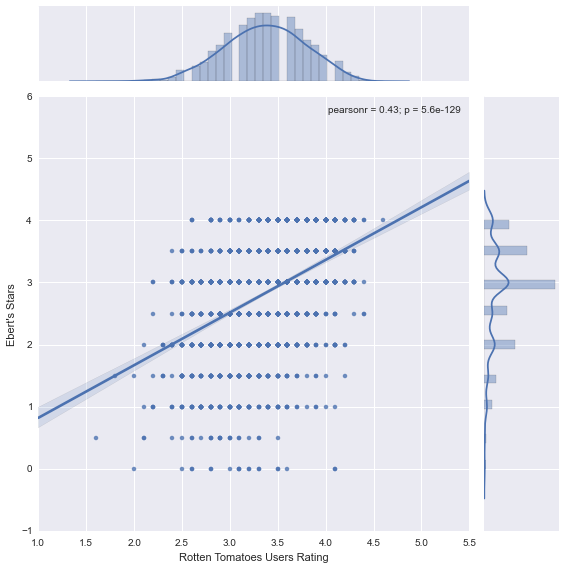

In [51]:
seaborn.jointplot(x='userRating', y='EbertStars', data = complete_df, kind = 'reg', size = 8)
plt.xlabel("Rotten Tomatoes Users Rating")
plt.ylabel("Ebert's Stars")
# plt.title('Ebert Stars vs. Metacritic')

## 1f. Ideal correlation: Metacritic vs Rotten Tomato Critic Rating
Here is an example of the correlation that I would like to see. Both metacritic and Rotten Tomatoes' critic ratings aggregate reviews from critics. So naturally, they would have such a relationship. However, the correlation with Mr. Ebert's reviews are not as linear.

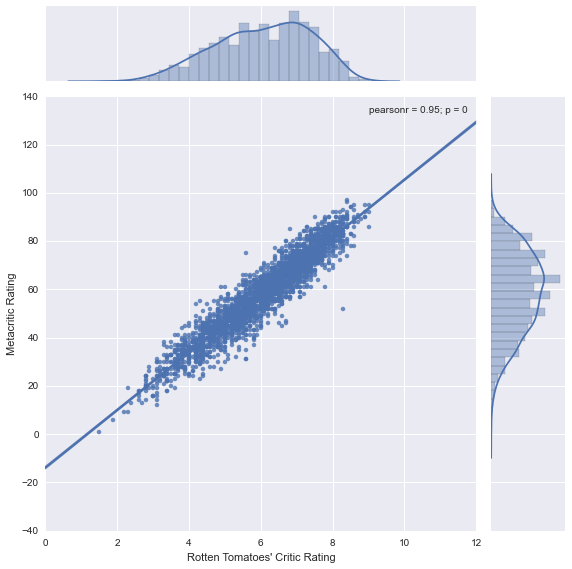

In [52]:
seaborn.jointplot(x='Rating', y='Metacritic', data = complete_df, kind = 'reg', size = 8)
plt.xlabel("Rotten Tomatoes' Critic Rating")
plt.ylabel("Metacritic Rating")
# plt.title('Ebert Stars vs. Metacritic')

## 1g. Distribution of ratings across genres:
Subset each genre to plot it's rating distribution

In [5]:
## I subset all movies to their respective genre
Action = movie_df[movie_df['Action'] == 1]
Adventure = movie_df[movie_df['Adventure'] == 1]
Animation=movie_df[movie_df['Animation'] == 1]
Biography= movie_df[movie_df['Biography'] == 1]
Comedy= movie_df[movie_df['Comedy'] == 1]
Crime= movie_df[movie_df['Crime'] == 1]
Documentary= movie_df[movie_df['Documentary'] == 1]
Drama= movie_df[movie_df['Drama'] == 1]
Family= movie_df[movie_df['Family'] == 1]
Fantasy= movie_df[movie_df['Fantasy'] == 1]
History= movie_df[movie_df['History'] == 1]
Horror= movie_df[movie_df['Horror'] == 1]
Music= movie_df[movie_df['Music'] == 1]
Musical= movie_df[movie_df['Musical'] == 1]
Mystery= movie_df[movie_df['Mystery'] == 1]
News= movie_df[movie_df['News'] == 1]
Romance= movie_df[movie_df['Romance'] == 1]
SciFi= movie_df[movie_df['Sci-Fi'] == 1]
Short= movie_df[movie_df['Short'] == 1]
Sport= movie_df[movie_df['Sport'] == 1]
Thriller= movie_df[movie_df['Thriller'] == 1]
War= movie_df[movie_df['War'] == 1]
Western= movie_df[movie_df['Western'] == 1]
foreign = movie_df[movie_df['foreign'] == 1]

In [6]:
# Action['Genre'] = 'Action'

## Iterating through the genres, I separate each movie genre string into a list
def separate_genre(gen_list, gen_string):
    gen_list['Genre'] = gen_string
    return gen_list[['Genre', 'EbertStars']]

genrenames = ['Action', 'Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy',
          'History','Horror','Music','Musical','Mystery','News','Romance','SciFi','Short','Sport','Thriller','War','Western']
genres = [Action, Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,
          History,Horror,Music,Musical,Mystery,News,Romance,SciFi,Short,Sport,Thriller,War,Western]

for item, s in zip(genres, genrenames):
    item = separate_genre(item, s)

/Users/Ozzie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
## Then I iterate through each genre, and append them to the first list 'Action'
for g in genres[1:]:
    Action = Action.append(g)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

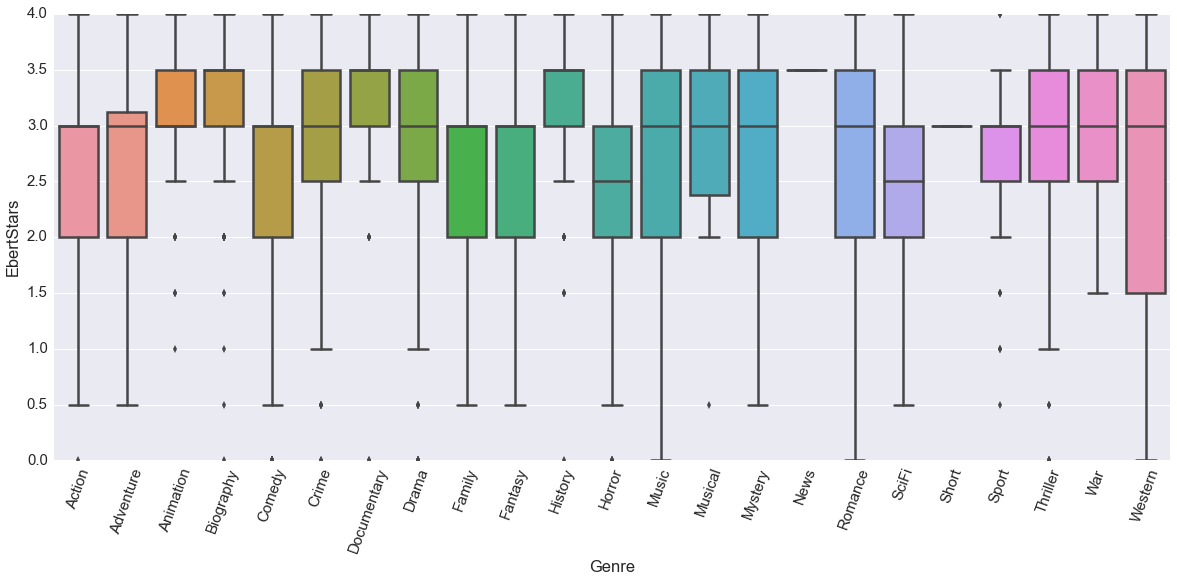

In [8]:
## Now I have one dataframe, and I can plot the boxplot
plt.figure(figsize=(20,8))
seaborn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
seaborn.boxplot(x="Genre", y="EbertStars", data=Action)
plt.xticks(rotation=70)

# 2. Regression Models
<a id='2-regression'></a>

In [100]:
## Create a new data frame that has N/A values removed
regression_df = movie_df.dropna()
y = regression_df['EbertStars']
X = regression_df.drop('EbertStars', 1)

## Create a training and test set to model on. With 70% chosen at random for training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

## 2.1 Regression model based on just the 4 other ratings

In [102]:
## isolate the features for the training X
X_1 = X_train[['imdbRating', 'Metacritic', 'Rating', 'userRating']]

In [104]:
## Add constant and use StatsModels to generate an OLS regression model
X_1 = sm.add_constant(X_1)
model_1 = sm.OLS(y_train, X_1)
model_1_fit = model_1.fit()
model_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             EbertStars   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     431.4
Date:                Tue, 02 Feb 2016   Prob (F-statistic):          7.36e-268
Time:                        16:22:47   Log-Likelihood:                -1820.7
No. Observations:                1995   AIC:                             3651.
Df Residuals:                    1990   BIC:                             3679.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6417      0.118      5.445      0.000         0.411     0.873
imdbRating     0.1525      0.034      4.495      0.000         0.086     0.219
Metacritic     0.0170      0.003      6.724      0.000         0.012     0.022
Rating         0.1913      0.035      5.455      0.000         0.123     0.260
userRating    -0.2915      0.060     -4.851      0.000        -0.409    -0.174
==============================================================================
Omnibus:                      182.342   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.315
Skew:                          -0.633   Prob(JB):                     1.69e-70
Kurtosis:                       4.504   Cond. No.                         550.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R Squared of 0.46 is not too bad. But let's introduce our genres to see if we can improve it before we apply the model to the test set

## 2.2 Regression including genre categories with dummy variables

In [106]:
## Select just the features I want, separate x and y, then split into training and test sets
X_2 = X_train.drop(['Title', 'imdbID', 'userReviews', 'Genre'], 1)

In [107]:
## Since I'm using dummy variables, I don't need to add a constant term.
## Make the model here with statsmodels
model_2 = sm.OLS(y_train, X_2)
model_2_fit = model_2.fit()
model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             EbertStars   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1669.
Date:                Tue, 02 Feb 2016   Prob (F-statistic):               0.00
Time:                        16:24:30   Log-Likelihood:                -1785.9
No. Observations:                1995   AIC:                             3628.
Df Residuals:                    1967   BIC:                             3785.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Metacritic      0.0135      0.003      5.378      0.000         0.009     0.018
imdbRating      0.1398      0.034      4.158      0.000         0.074     0.206
Rating          0.2247      0.035      6.426      0.000         0.156     0.293
userRating     -0.1443      0.057     -2.514      0.012        -0.257    -0.032
Action          0.0462      0.044      1.044      0.297        -0.041     0.133
Adventure       0.0673      0.049      1.379      0.168        -0.028     0.163
Animation       0.1136      0.083      1.367      0.172        -0.049     0.277
Biography       0.0751      0.057      1.313      0.189        -0.037     0.187
Comedy          0.0083      0.033      0.251      0.802        -0.056     0.073
Crime           0.0808      0.039      2.059      0.040         0.004     0.158
Documentary     0.0439      0.076      0.581      0.561        -0.104     0.192
Drama           0.2516      0.038      6.654      0.000         0.177     0.326
Family          0.0335      0.066      0.508      0.612        -0.096     0.163
Fantasy         0.1564      0.059      2.630      0.009         0.040     0.273
History         0.0201      0.074      0.271      0.787        -0.126     0.166
Horror         -0.0585      0.064     -0.912      0.362        -0.184     0.067
Music           0.0396      0.069      0.574      0.566        -0.096     0.175
Musical         0.0694      0.174      0.400      0.689        -0.271     0.410
Mystery         0.0867      0.054      1.616      0.106        -0.019     0.192
News           -0.1404      0.604     -0.232      0.816        -1.325     1.044
Romance         0.0869      0.036      2.384      0.017         0.015     0.158
Sci-Fi          0.0220      0.064      0.341      0.733        -0.104     0.148
Short          -0.3597      0.600     -0.599      0.549        -1.536     0.817
Sport           0.0596      0.081      0.733      0.464        -0.100     0.219
Thriller        0.1284      0.044      2.928      0.003         0.042     0.214
War             0.0522      0.095      0.547      0.584        -0.135     0.239
Western        -0.2716      0.174     -1.561      0.119        -0.613     0.070
foreign        -0.1332      0.036     -3.682      0.000        -0.204    -0.062
==============================================================================
Omnibus:                      167.161   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.971
Skew:                          -0.577   Prob(JB):                     2.20e-67
Kurtosis:                       4.537   Cond. No.                     2.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number i

A high R-squared 0.960 says that my data is close to the regression line. But how can I measure it's accuracy?  
With a numerical target Y, I can use absolute difference between the actual and predicted value. I can also use the mean square error which in most cases makes more sense. We'll try them both

In [78]:
## Sum of square residuals
# ssr = sum((y_pred_2-y_test_2)**2/len(y_pred_2))
# avg = np.mean(y_test_2-y_pred_2)
# print ssr, avg

1642.83341799 -38.9601866888


## 2.3 Extending model with Cross Validation 
Using scikitlearn's regression modeling, I now extend the 2nd model and its appropriate features with cross validation
to obtain an overview of its accuracy.

In [140]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, X_2, y_train, cv = 5)
print scores, scores.mean()

[ 0.45167339  0.46498555  0.50503508  0.43065667  0.47263781] 0.464997701221


OK, So I'm seeing a mean absoluate error of about 0.45-0.5 stars with the current model through a cross validation to the training set.

## 2.4 Testing on Test set

In [118]:
## Helper function to calculate the mean absolute error
def mean_absolute_error(a, b):
    return np.mean(abs(a-b))

## Helper function to calcuate the mean squared error
def mean_squared_error(a, b):
    return (sum((a-b)**2))**0.5

In [150]:
## First test the first model on the test set, dropping columns to fit its features
X_1_test = X_test[['imdbRating', 'Metacritic', 'Rating', 'userRating']]
y_pred_1 = model_1_fit.predict(sm.add_constant(X_1_test))
## Then calculate their Mean Absolute Error (MAE) and Mean Squared Errors (MSE)
print 'MAE:', mean_absolute_error(y_pred_1, y_test)
print 'MSE:', mean_squared_error(y_pred_1, y_test)

MAE: 0.452999082447
MSE: 17.063945593


In [126]:
## Now, test the 2nd model
X_2_test = X_test.drop(['Title', 'imdbID', 'userReviews', 'Genre'], 1)
y_pred_2 = model2_fit.predict(X_2_test)
print 'MAE:', mean_absolute_error(y_pred_2, y_test)
print 'MSE:', mean_squared_error(y_pred_2, y_test)

MAE: 0.434381067311
MSE: 16.462922295


And so it looks like the 2nd model with the higher R-squared, actually does have a lower mean absolute and mean squared error.

# 3. Predicting some current movies
<a id='3-predicting'></a>
With a pretty well fitting model, let's try to predict how Mr. Ebert might review movies out in early 2016 based on our features.
We look at Star Wars VII and Dirty Grandpa.

In [149]:
starwars = np.array([93, 8.4, 9.2,9.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0])
dirtygrandpa = [18 , 5.8, .8, 5.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print model2_fit.predict(starwars)
print model2_fit.predict(dirtygrandpa)

[ 3.36349643]
[ 0.52286363]


So according to our model and round our results, Ebert might give Star Wars VII between 3.0 and 3.5 stars.  
On the other hand, Dirty Grandpa, will probably get 0.5 stars.